# Реализация популярных СНС
1) VGG16

2) Inception module

3) Residual module

# Реализация с нуля VGG16
Статья https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.utils import plot_model

In [2]:
def vgg16_block(layer_in, n_filters, n_conv):
    
    for _ in range(n_conv):
        layer_in = Conv2D(n_filters, (3,3), padding='same',
                          activation='relu')(layer_in)
    layer_in = MaxPooling2D()(layer_in)
    return layer_in

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 64)      0         
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
_________________________________________________________________


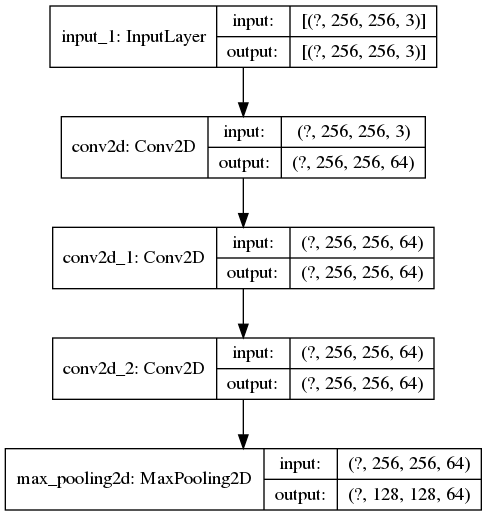

In [3]:
visible = Input(shape=(256,256,3))
layer = vgg16_block(visible, 64, 3)
model = Model(inputs=visible, outputs=layer)
model.summary()
plot_model(model, show_shapes=True, to_file='vgg.png')

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 128, 128, 128)    

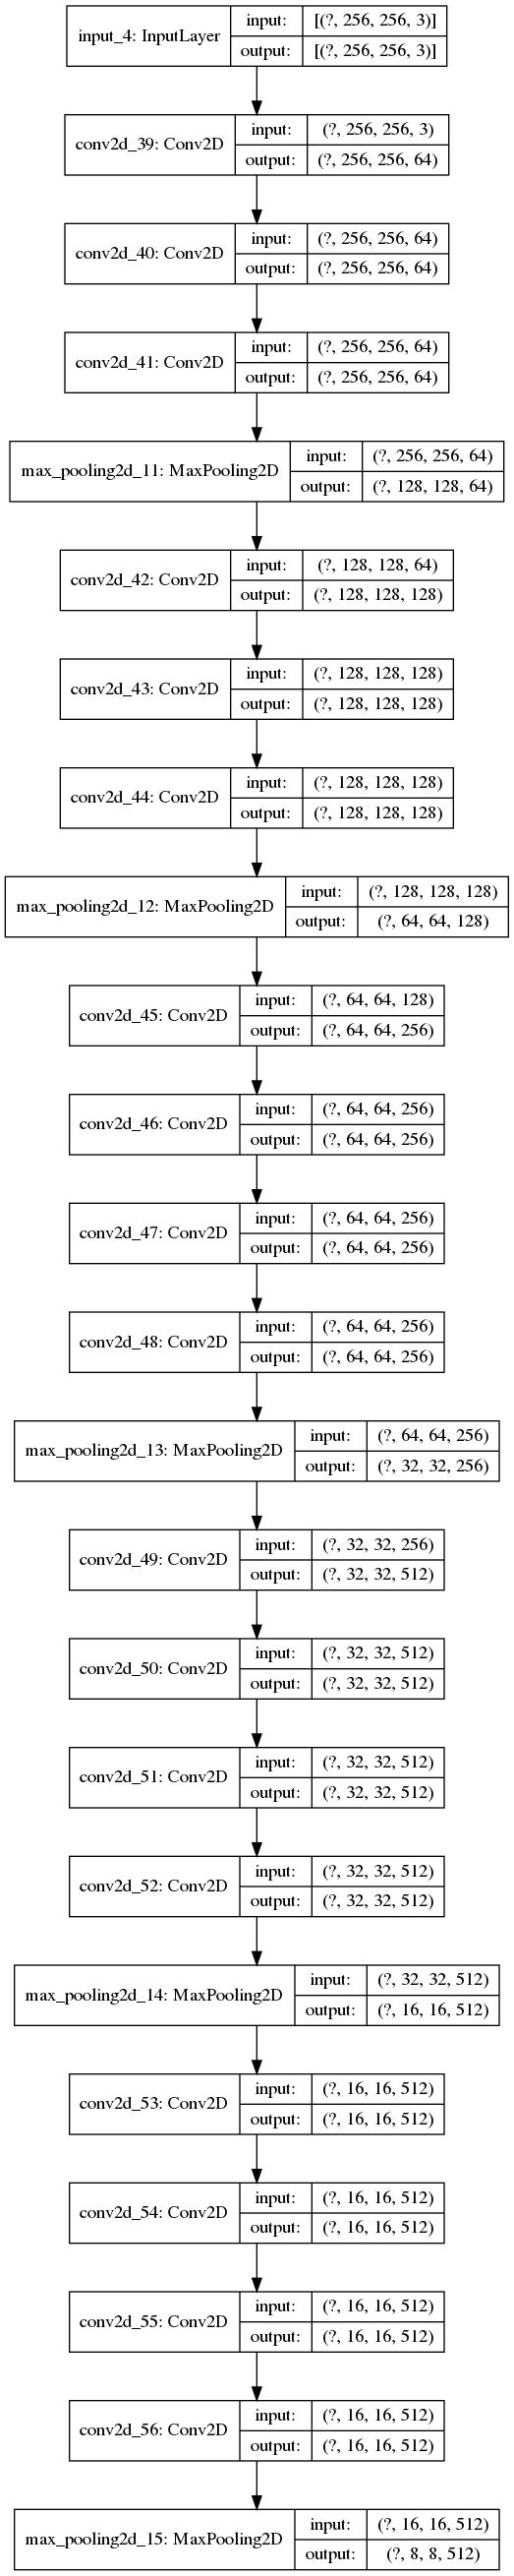

In [7]:
visible = Input(shape=(256,256,3))

layer = vgg16_block(visible, 64, 3)

layer = vgg16_block(layer, 128, 3)

layer = vgg16_block(layer, 256, 4)

layer = vgg16_block(layer, 512, 4)

layer = vgg16_block(layer, 512, 4)

vgg16 = Model(inputs=visible, outputs=layer)
vgg16.summary()
plot_model(vgg16, show_shapes=True, to_file='./image/vgg.png')

# Inception

In [13]:
from tensorflow.keras.layers import Concatenate

In [20]:
def inception_module(layer_in, f1, f2_in, f2_out, f3_in, f3_out, f4_out):
    conv1 = Conv2D(f1, (1,1), padding='same', activation='relu')(layer_in)
    
    conv3 = Conv2D(f2_in, (1,1), padding='same', activation='relu')(layer_in)
    conv3 = Conv2D(f2_out, (3,3), padding='same', activation='relu')(conv3)
    
    conv5 = Conv2D(f3_in, (1,1), padding='same', activation='relu')(layer_in)
    conv5 = Conv2D(f3_out, (5,5),padding='same', activation='relu')(conv5)
    
    pool = MaxPooling2D((3,3), strides=(1,1), padding='same')(layer_in)
    pool = Conv2D(f4_out, (1,1), padding='same', activation='relu')(pool)
    
    layer_out = Concatenate(axis=-1)([conv1, conv3, conv5, pool])
    return layer_out

In [21]:
visible = Input(shape=(256, 256, 3))
layer = inception_module(visible, 64, 96, 128, 16, 32, 32)

model_inc = Model(inputs=visible, outputs=layer)

In [22]:
model_inc.summary()

Model: "functional_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 256, 256, 96) 384         input_9[0][0]                    
__________________________________________________________________________________________________
conv2d_84 (Conv2D)              (None, 256, 256, 16) 64          input_9[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_20 (MaxPooling2D) (None, 256, 256, 3)  0           input_9[0][0]                    
______________________________________________________________________________________

In [ ]:
plot_model()

# Residual Module

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, Activation, add
from tensorflow.keras.utils import plot_model

In [4]:
def residual_module(layers_in, n_filters):
    merge_input = layers_in
    if layers_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters,(1,1),padding='same',
                             activation='relu', 
                             kernel_initializer='he_normal')(layers_in)
    conv1 = Conv2D(n_filters, (3,3),padding='same',
                   kernel_initializer='he_normal',activation='relu')(layers_in)
    conv2 = Conv2D(n_filters,(3,3),padding='same',
                   kernel_initializer='he_normal', activation='linear')(conv1)
    layer_out = add([conv2, merge_input])
    layer_out = Activation('relu')(layer_out)
    return layer_out

In [5]:
visible = Input(shape=(256,256,3))
layer = residual_module(visible, 64)
model = Model(inputs=visible, outputs=layer)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 64) 256         input_1[0][0]                    
_______________________________________________________________________________________

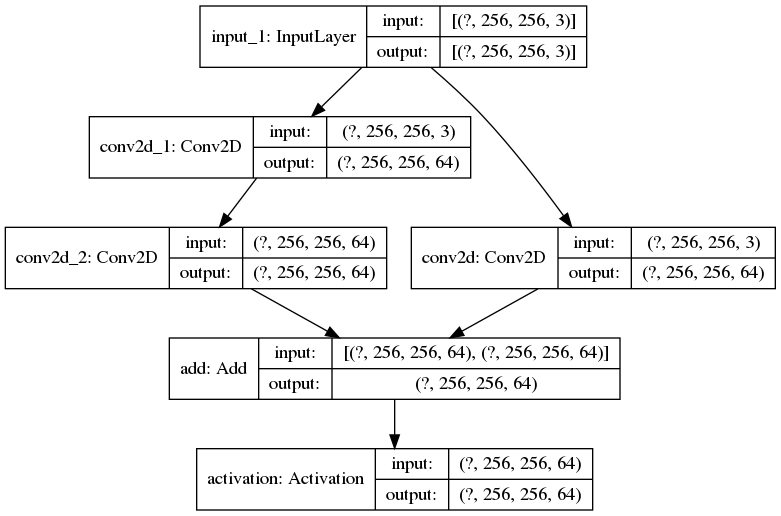

In [6]:
plot_model(model, show_shapes=True, to_file='./image/residual_module.png')